### 1. Representing multi-qubit states

A single qubit has two possible states and has two complex ampitudes. Two qubits has four possible states:

00, 01,10,11

And to describe a state of two qubits requires four complex amplitudes. We store these amplitudes in 4D vector like;

$|a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}$

The rules of measurement works same way:

$p(|00\rangle) = |\langle 00 | a \rangle |^2 = |a_{00}|^2$

And the normalization condition is

$|a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1$

If we have two separated qubits, we can describe their collective state using the tensor product:

$|a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix}$

$|ba\rangle = |b\rangle \otimes |a\rangle = \begin{bmatrix} b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\ b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{bmatrix}$

If we have $n$ qubits we have to keep track of $2^n$ complex amplitudes.

For two qubit system the basis vectors are $|00\rangle, |01\rangle, |10\rangle$ and $|11\rangle$.
In the column vectors they are represented as,
$|00\rangle= \begin{bmatrix} 1 \\ 0\\0\\0 \end{bmatrix}$, $|01\rangle= \begin{bmatrix} 0 \\ 1\\0\\0 \end{bmatrix}$, $|10\rangle= \begin{bmatrix} 0 \\ 0\\1\\0 \end{bmatrix}$ and $|11\rangle= \begin{bmatrix} 0\\ 0\\0\\1 \end{bmatrix}$

#### Example of 3 qubit circut:

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram

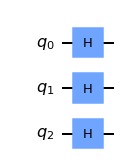

In [2]:
qc= QuantumCircuit(3)
# apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# see the circuit
qc.draw('mpl')

In [3]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

CHECK: 
$|q_2q_1q_0\rangle = |000\rangle$
applying H-gate on each, since $H|0\rangle =\tfrac{1}{\sqrt2} (|0\rangle+|1\rangle)$
then applying H-gate on each will result

$\tfrac{1}{\sqrt8}(|0\rangle+|1\rangle)\otimes(|0\rangle+|1\rangle)\otimes (|0\rangle+|1\rangle)$. 


$=  \tfrac{1}{\sqrt8}\begin{bmatrix} 1 \\ 1 \end{bmatrix}\otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

= $\tfrac{1}{\sqrt8} \begin{bmatrix} 1 \\ 1 \end{bmatrix}\otimes \begin{bmatrix} 1\begin{bmatrix} 1 \\ 1 \end{bmatrix} \\ 1\begin{bmatrix} 1 \\ 1 \end{bmatrix} \end{bmatrix} $ 

= $\tfrac{1}{\sqrt8}\begin{bmatrix} 1 \\ 1 \end{bmatrix}\otimes \begin{bmatrix} 1 \\ 1\\1\\1 \end{bmatrix}$

= $\tfrac{1}{\sqrt8} \begin{bmatrix} 1 \begin{bmatrix} 1 \\ 1\\1\\1 \end{bmatrix}\\ 1 \begin{bmatrix} 1 \\ 1\\1\\1 \end{bmatrix}\end{bmatrix}$

= $\tfrac{1}{\sqrt8}\begin{bmatrix} 1 \\ 1\\1\\1\\1\\1\\1\\1 \end{bmatrix} $


### 2. Single Qubit gates on multi-qubit state vectors

$X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1\end{bmatrix} = |1\rangle$

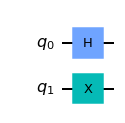

In [4]:
qc= QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

In [5]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()

In [6]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

If we want to apply a gate to only one qubit at a time (such as below), we do the tensor product with the identity matrix, e.g.:

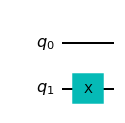

In [7]:
qc= QuantumCircuit(2)
qc.x(1)
qc.draw('mpl')

In [8]:
# Simulate the unitary
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
# Display the results:
array_to_latex(unitary, pretext="\\text{Circuit = } ")

<IPython.core.display.Math object>

### Quick Exercises:

1. Calculate the single qubit unitary ($U$) created by the sequence of gates:  
$U=XZH$. Use Qiskit's unitary simulator to check your results.


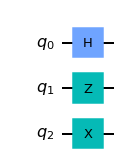

In [9]:
qc3= QuantumCircuit(3) # three because we are seeing three operators
qc3.h(0)
qc3.z(1)
qc3.x(2)
qc3.draw('mpl')


In [10]:
backend= Aer.get_backend('unitary_simulator')
unitary =execute(qc3, backend).result().get_unitary()

In [11]:
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit=}\n")

<IPython.core.display.Math object>

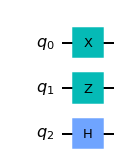

In [12]:
# now changing the order of gates
qc4 = QuantumCircuit(3)
qc4.x(0)
qc4.z(1)
qc4.h(2)
qc4.draw('mpl')

In [13]:
backend= Aer.get_backend('unitary_simulator')
unitary =execute(qc4, backend).result().get_unitary()

In [14]:
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit=}\n")

<IPython.core.display.Math object>

## 3. Multi-Qubit Gates:
### 3.1 CNOT gate

An important two qubit gate is CNOT (controlled NOT gate) gate

This gate is a conditional gate that performs an X-gate on the second qubit (target), if the state of the first qubit (control) is  |1⟩. The gate is drawn on a circuit like this, with `q0` as the control and `q1` as the target:

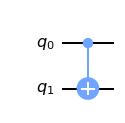

In [15]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1) # q0 is control and q1 is target
# See the circuit:
qc.draw('mpl')

Depending on which qubit is control and which is the target, CNOT gate has the following 4D 
matrix form:

$ \text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
              \end{bmatrix}, \quad
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix}$

In our case, the left matrix corresponds to the CNOT in the circuit above. This matrix swaps the amplitudes of  `|01⟩` and  `|11⟩` in our statevector:

$|a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|a\rangle = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}$

We have seen how this acts on classical states, but let’s now see how it acts on a qubit in superposition. We will put one qubit in the state $|+⟩$:

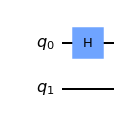

In [16]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw('mpl')

In [17]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

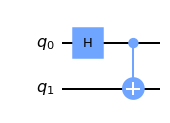

In [18]:
# Lets apply the CNOT gate:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

In [19]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

We see we have the state: 
$\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

This state is very interesting to us, because it is entangled. This leads us neatly on to the next section.



## 3.2 Entangled State:

 The entangled state is $\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$, which has 50% of chance being in the state $|00\rangle$ and 50% chance of being at $|11\rangle$ but 0% chance being in the states $|01\rangle$ and $|10\rangle$ This state is called Bell state.

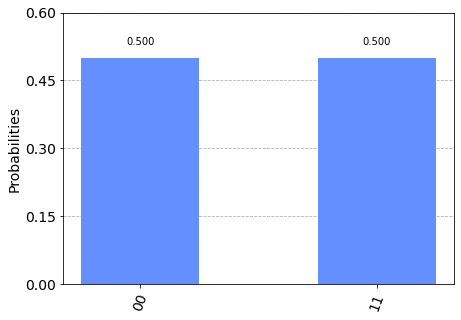

In [20]:
# let's check the result
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

We can not write this entangled state as the tensor product of two one qubit states. Let's prove it.

Let $|\Psi\rangle$ is two qubit entangled quantum state. Let us try to write this as the tensor product of two states $|\psi\rangle_1 = a_1|0\rangle +b_1|1\rangle$ and $|\psi\rangle_2 = a_2|0\rangle +b_2|1\rangle$

$|\psi\rangle_1 \otimes |\psi\rangle_2 =(a_1|0\rangle +b_1|1\rangle)\otimes (a_2|0\rangle +b_2|1\rangle)$

$|\Psi\rangle  = a_1a_2|00\rangle + a_1b_2|01\rangle+b_1a_2|10\rangle+ b_1b_2|11\rangle $ = $\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$


Which indicates that $a_1a_2=b_1b_2 =\tfrac{1}{\sqrt{2}}$ and  $a_1b_2=0= b_1a_2$. If $a_1$=0 but  $a_1a_2=\tfrac{1}{\sqrt{2}}$, this is contradiction. Hence we can not write $ |\Psi\rangle$ as tensor product of two 1-qubit states.

### Difference between Superposition and Entanglement: 

Superposition is essentially the ability of a quantum system to be in multiple states at the same time — that is, something can be “here” and “there,” or “up” and “down” at the same time.

Entanglement is an extremely strong correlation that exists between quantum particles — so strong, in fact, that two or more quantum particles can be inextricably linked in perfect unison, even if separated by great distances. The particles are so intrinsically connected, they can be said to “dance” in instantaneous, perfect unison, even when placed at opposite ends of the universe. This seemingly impossible connection inspired Einstein to describe entanglement as “spooky action at a distance.”

### 3.3 Visualizing Entangled states

We have seen that this state cannot be written as two separate qubit states, this also means we lose information when we try to plot our state on separate Bloch spheres:

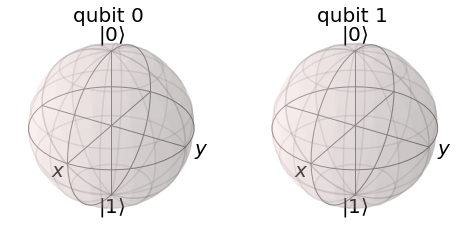

In [21]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(final_state)

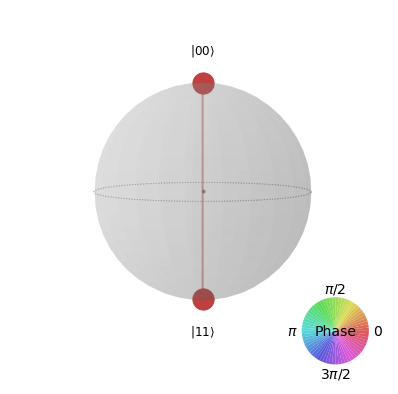

In [22]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

### 3.4 Exercise:

1. Create a quantum circuit that produces the Bell state:  
$\tfrac{1}{\sqrt2}(|01\rangle+|10\rangle)$. Use the statevector simulator to verify your result.

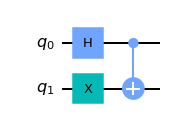

In [23]:
qc=QuantumCircuit(2)
qc.h(0)  # apply H-gate to the first
qc.x(1)  # apply X-gate to make it |1>
qc.cx(0,1) # apply CNOT gate to with q0 control bit and q1 target
qc.draw('mpl')

In [24]:
# let's see the result
backend=Aer.get_backend('statevector_simulator')
final_state=execute(qc,backend).result().get_statevector()
# To print state vector
array_to_latex(final_state, pretext="\\text{Statevector=}")

<IPython.core.display.Math object>

Hence:

$\text{CNOT}|1{+}\rangle = \tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

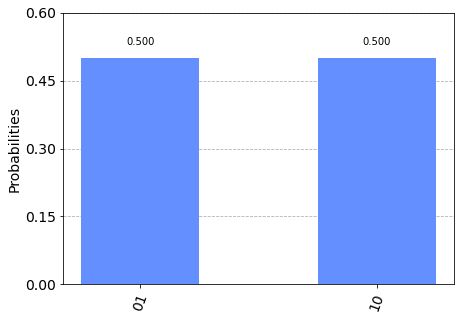

In [25]:
#Lets plot Histogram
results=execute(qc,backend).result().get_counts()
plot_histogram(results)

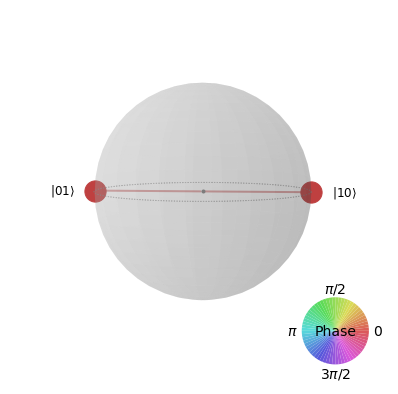

In [26]:
plot_state_qsphere(final_state)

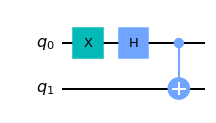

In [27]:
#Now create two qubit state with different phases
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.x(0)
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

[ 0.70710678-0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]


<IPython.core.display.Math object>

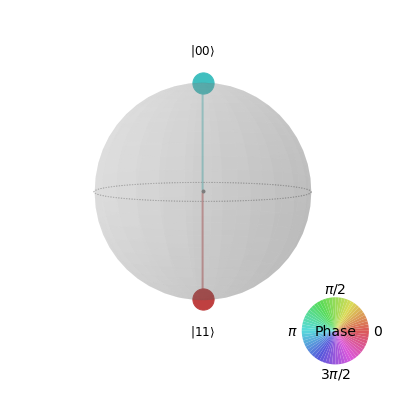

In [28]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
job = execute(qc,backend).result() # Do the simulation, returning the state vector
print(np.round(final_state,10))
array_to_latex(final_state, pretext="\\text{Statevector} = ")
plot_state_qsphere(job.get_statevector(qc))

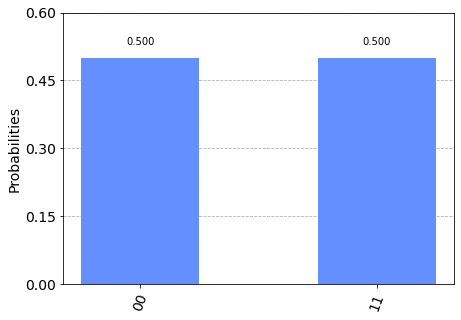

In [29]:
#Lets plot Histogram
results=execute(qc,backend).result().get_counts()
plot_histogram(results)

[ 0.70710678-0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]


<IPython.core.display.Math object>

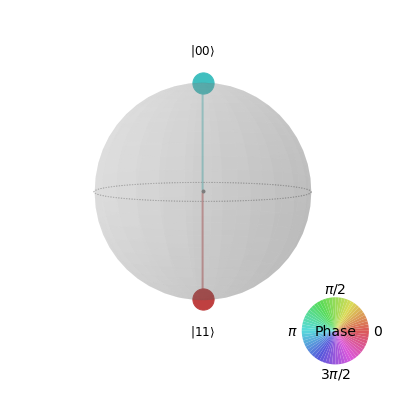

In [32]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
job = execute(qc,backend).result() # Do the simulation, returning the state vector
print(np.round(final_state,10))
array_to_latex(final_state, pretext="\\text{Statevector} = ")
plot_state_qsphere(job.get_statevector(qc))

## Additional Links:
1. Observation of Three-Photon Greenberger-Horne-Zeilinger Entanglement 

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.82.1345

2. Qiskit Visualizations

https://qiskit.org/documentation/apidoc/visualization.html
